**Auteur :** GLAIBA HAMZA

**Adresse mail :** [hamzaglaiba@gmail.com](https://hamzaglaiba@gmail.com)

Pour relever ce défi, nous commencerons par une analyse exploratoire approfondie des données afin de bien comprendre le contenu des annonces immobilières. Cette étape nous permettra d'identifier les lacunes et les améliorations nécessaires pour le processus de dédoublonnage. Ensuite, nous aborderons le traitement des variables, en mettant en place des méthodes pour standardiser et organiser les informations contenues dans les annonces. Une fois que nous aurons préparé les données, nous expérimenterons différentes approches et techniques pour dédoublonner les annonces, en veillant à ce que la recherche soit plus efficace et que les statistiques générées soient plus pertinentes. Notre objectif ultime est de simplifier la recherche immobilière et de fournir des informations fiables aux utilisateurs.



---
# **Importation et Traitement**





---
### **Importation des données et une première exploration**



In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [206]:
df=pd.read_csv("C:\\Users\\33751\\OneDrive\\Bureau\\entretien\\dataentretien.csv",sep=',')

In [207]:
# Définir l'option d'affichage pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)
df


,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,TERRACE_SURFACE,ROOM_COUNT,BEDROOM_COUNT,BATHROOM_COUNT,LUNCHROOM_COUNT,TOILET_COUNT,FURNISHED,FIREPLACE,AIR_CONDITIONING,GARDEN,SWIMMING_POOL,BALCONY,TERRACE,CELLAR,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,ENERGY_CONSUMPTION,GREENHOUSE_GAS_CONSUMPTION,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,[],COLLECTIVE,NaN,NaN,NaN,True,NaN,NaN,NaN,RENT,1979.0,27.49,"[{""price"":1979,""date"":""2017-03-22""}]",276.0,True,NaN,NaN,NaN,False,NaN,NaN,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,NaN,[],INDIVIDUAL,1.0,6.0,NaN,True,False,NaN,NaN,SALE,429000.0,8937.50,"[{""price"":452000.0,""date"":""2018-09-18""},{""pric...",NaN,NaN,NaN,NaN,False,False,NaN,False,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,4970000.0,18614.23,"[{""price"":4970000.0,""date"":""2019-02-19""}]",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaN
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,89.0,1.78,"[{""price"":89.0,""date"":""2018-07-06""}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaN
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,2790000.0,8454.55,"[{""price"":3150000.0,""date"":""2019-04-08""},{""pri...",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,d3579370-824f-11e9-af18-9742751bcff8,https://www.bienici.com/annonce/ag750861-20035...,BIEN_ICI,APARTMENT,False,LEVALLOIS-PERRET. Bel appartement idéalement s...,"[""http://photos.ubiflow.net/750861/200354

<AxesSubplot:>

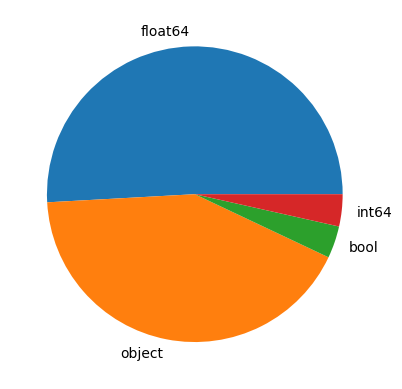

In [208]:
df.dtypes.value_counts().plot.pie()



---
### **Variables non pertinente**

dans le cadre de notre démarche, nous veillerons également à éliminer les variables qui présentent un pourcentage élevé de valeurs manquantes. Cela contribuera à garantir la qualité des données et à améliorer l'efficacité de notre processus de dédoublonnage des annonces immobilières.

<AxesSubplot:>

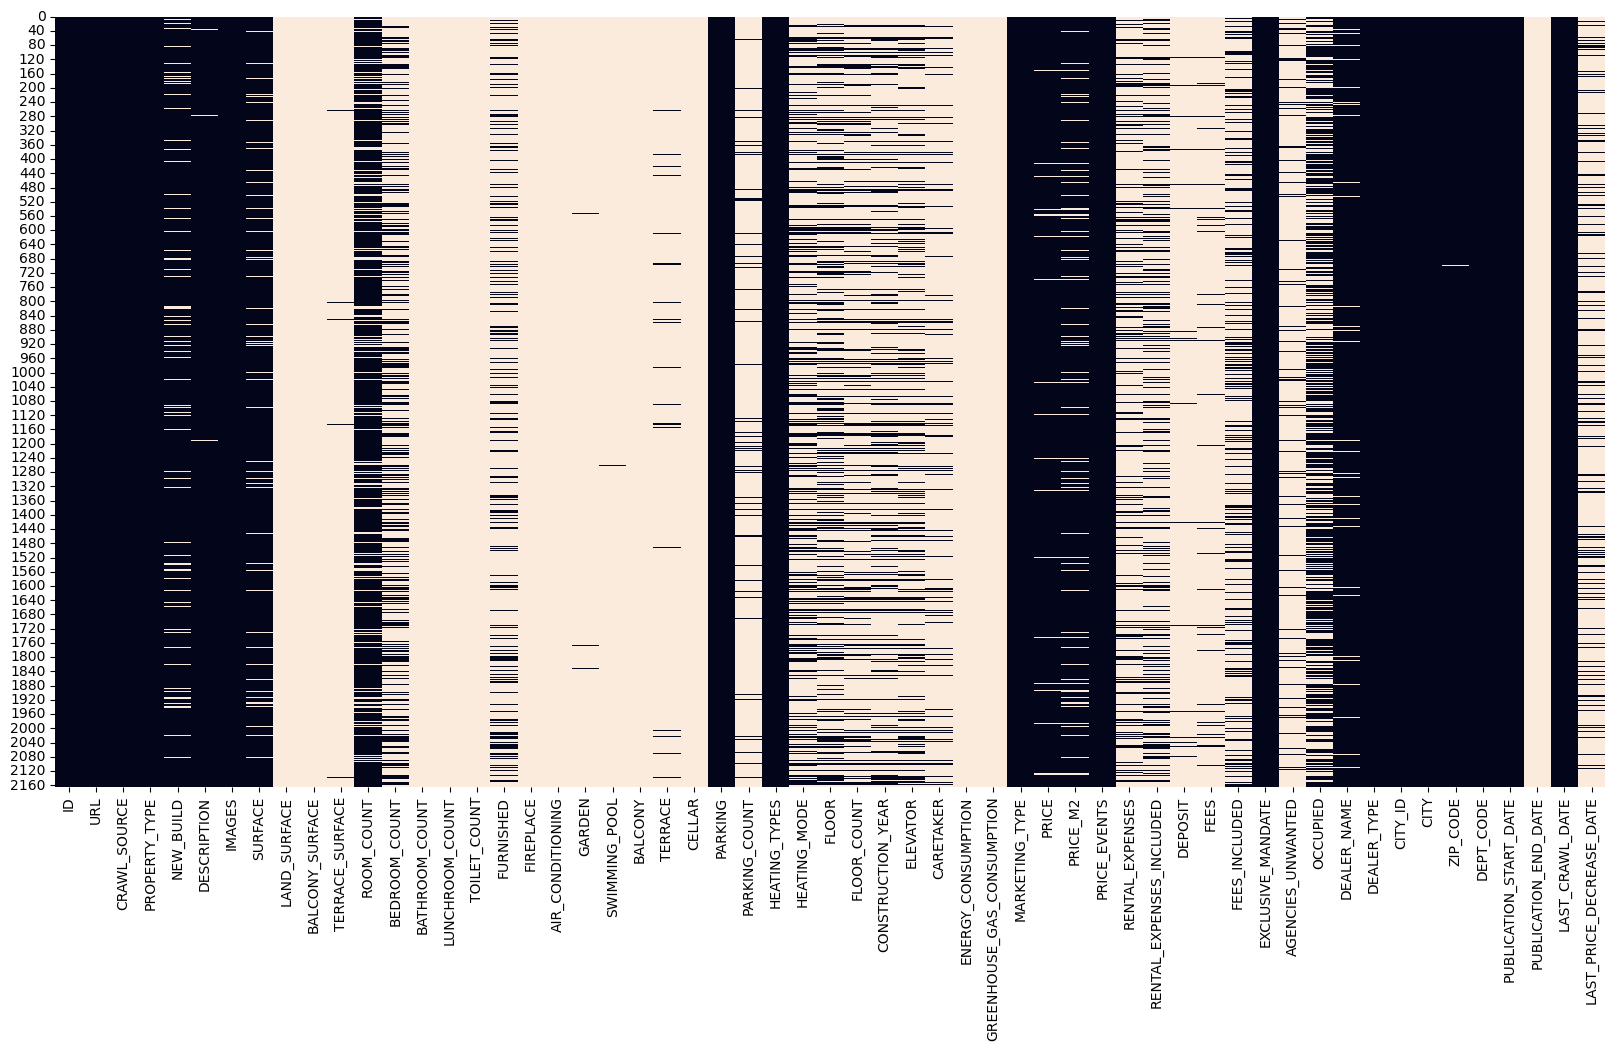

In [209]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [210]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

ID                            0.000000
LAST_CRAWL_DATE               0.000000
MARKETING_TYPE                0.000000
PRICE_EVENTS                  0.000000
EXCLUSIVE_MANDATE             0.000000
DEALER_TYPE                   0.000000
CITY_ID                       0.000000
CITY                          0.000000
PARKING                       0.000000
HEATING_TYPES                 0.000000
PUBLICATION_START_DATE        0.000000
IMAGES                        0.000000
PROPERTY_TYPE                 0.000000
CRAWL_SOURCE                  0.000000
URL                           0.000000
DEPT_CODE                     0.000000
ZIP_CODE                      0.000462
DESCRIPTION                   0.001848
PRICE                         0.027726
DEALER_NAME                   0.040203
SURFACE                       0.052680
PRICE_M2                      0.079945
NEW_BUILD                     0.088262
ROOM_COUNT                    0.152033
OCCUPIED                      0.441312
BEDROOM_COUNT            

On peut voir ci-dessus que plusieurs variables sont à 100% nulles.Par conséquent, on a decidé de supprimer les variables avec un pourcentage plus que 98% comme première approche.

In [211]:
threshold = 98  # Pourcentage seuil (98%)


for col in df.columns:
    na_percentage = df[col].isna().mean() * 100
    if na_percentage > threshold:
        df = df.drop(col, axis=1)

In [212]:
print("Nous avons  {} doublons dans df.".format(df.duplicated().sum()))

Nous avons  0 doublons dans df.


In [213]:
df.dtypes

ID                           object
URL                          object
CRAWL_SOURCE                 object
PROPERTY_TYPE                object
NEW_BUILD                    object
DESCRIPTION                  object
IMAGES                       object
SURFACE                     float64
ROOM_COUNT                  float64
BEDROOM_COUNT               float64
FURNISHED                    object
TERRACE                     float64
PARKING                        bool
PARKING_COUNT               float64
HEATING_TYPES                object
HEATING_MODE                 object
FLOOR                       float64
FLOOR_COUNT                 float64
CONSTRUCTION_YEAR           float64
ELEVATOR                     object
CARETAKER                    object
MARKETING_TYPE               object
PRICE                       float64
PRICE_M2                    float64
PRICE_EVENTS                 object
RENTAL_EXPENSES             float64
RENTAL_EXPENSES_INCLUDED     object
DEPOSIT                     



---
# **Statistiques Descriptives**



J'ai l'habitude d'utiliser **PivotTableJS** pour explorer dynamiquement mes données, ce qui offre une approche interactive et visuelle pour découvrir des tendances. Cependant, pour enrichir notre analyse, j'ai également intégré d'autres méthodes, notamment des statistiques descriptives. Cela vous permet de bénéficier de l'interactivité offerte par PivotTableJS tout en ayant accès à des statistiques qui fournissent des informations plus approfondies sur les données, vous permettant ainsi d'obtenir une perspective plus complète et précise de l'ensemble de vos informations.

In [214]:
from pivottablejs import pivot_ui

pivot_ui(df)

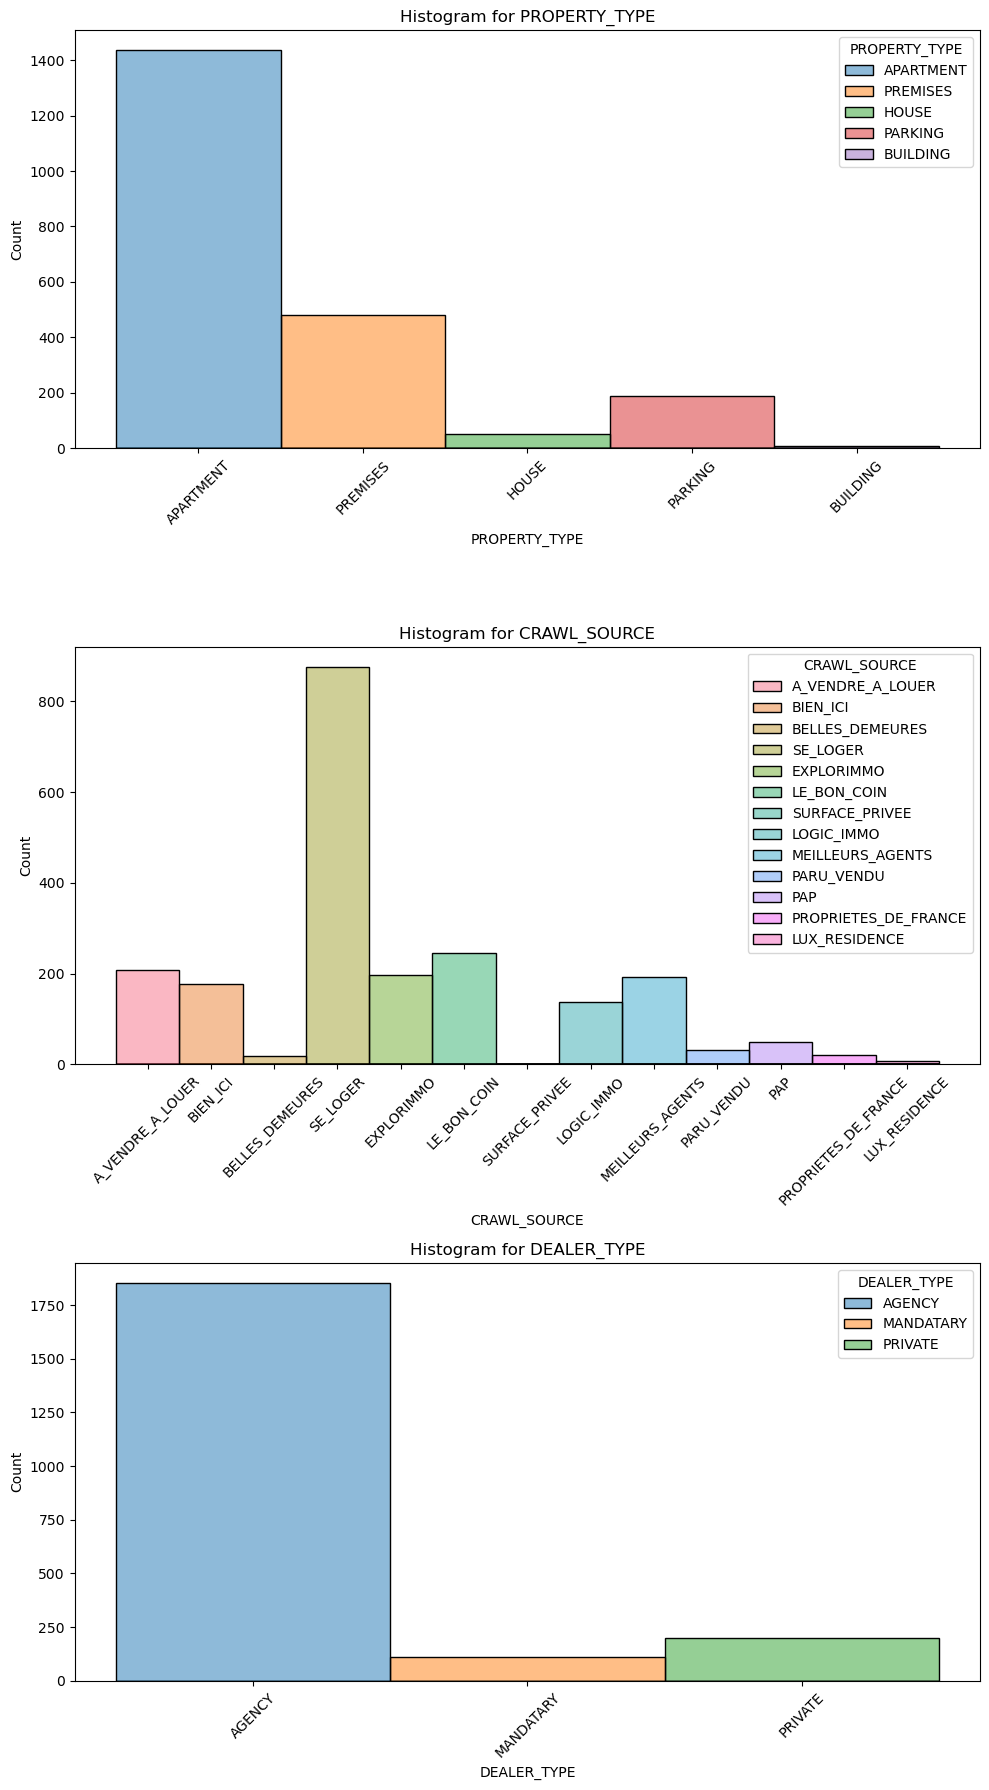

In [215]:

columns_to_plot = ['PROPERTY_TYPE', 'CRAWL_SOURCE', 'DEALER_TYPE']

n_rows = len(columns_to_plot)
n_cols = 1 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6 * n_rows))

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    
    g = sns.histplot(data=df, x=column, hue=column,fill=True, ax=ax)
    labels = df[column].unique()
    g.set_xticklabels(labels, rotation=45)
    
    ax.set_title(f'Histogram for {column}')

plt.tight_layout()
plt.show()


In [216]:


grouped_data = df.groupby('PROPERTY_TYPE')


intervals_data = pd.DataFrame(columns=['Description', 'Min Surface (m²)', 'Max Surface (m²)'])


for description, group in grouped_data:
    min_surface = group['SURFACE'].min()
    max_surface = group['SURFACE'].max()
    intervals_data = intervals_data.append({'Description': description, 'Min Surface (m²)': min_surface, 'Max Surface (m²)': max_surface}, ignore_index=True)

intervals_data


,Description,Min Surface (m²),Max Surface (m²)
0,APARTMENT,6.00,554.0
1,BUILDING,37.36,175.0
2,HOUSE,10.00,473.0
3,PARKING,7.00,25.0
4,PREMISES,12.00,10287.0


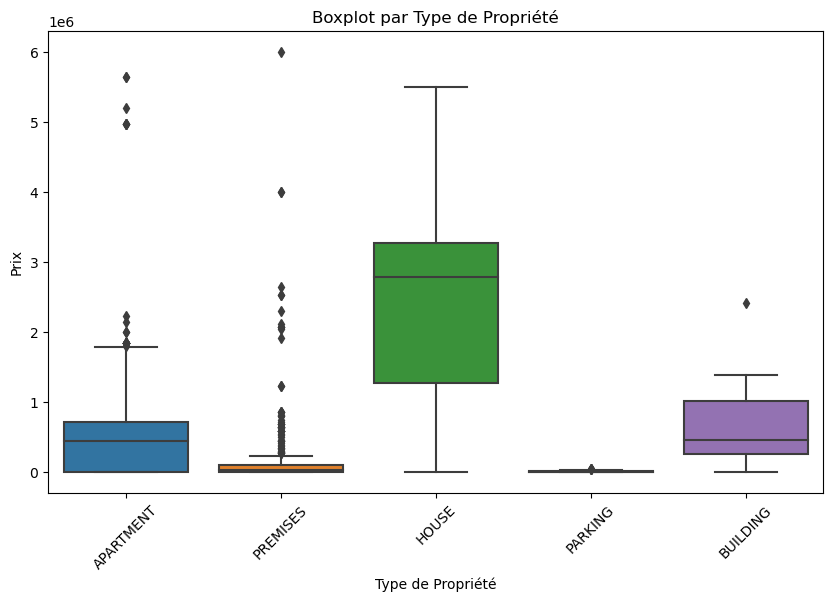

In [217]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PROPERTY_TYPE', y='PRICE')


plt.title('Boxplot par Type de Propriété')
plt.xlabel('Type de Propriété')
plt.ylabel('Prix')


plt.xticks(rotation=45)


plt.show()


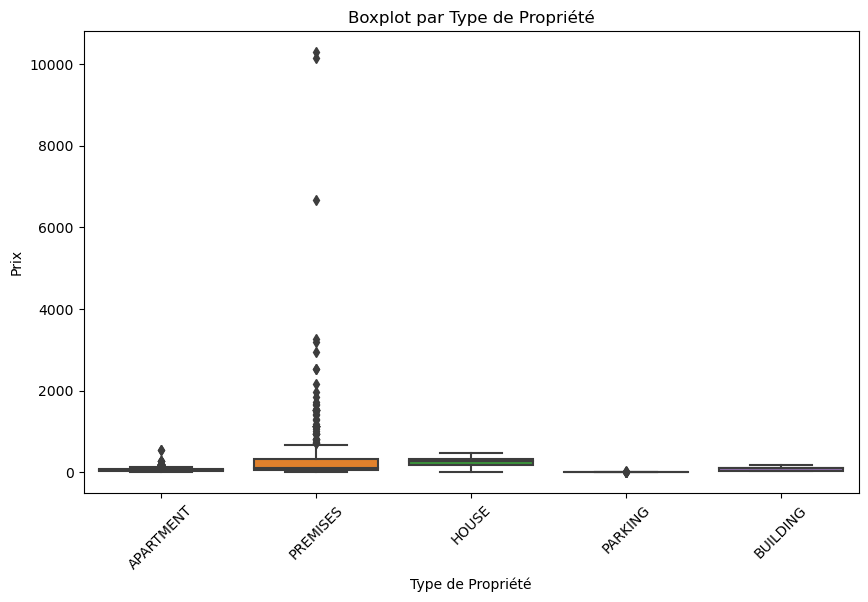

In [218]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PROPERTY_TYPE', y='SURFACE')


plt.title('Boxplot par Type de Propriété')
plt.xlabel('Type de Propriété')
plt.ylabel('Prix')


plt.xticks(rotation=45)


plt.show()


In [219]:
intervals_data2=[]


intervals_data2 = pd.DataFrame(columns=['Description', 'Min Price (euros)', 'Max Price (euros)'])


for description, group in grouped_data:
    min_price = group['PRICE'].min()
    max_price = group['PRICE'].max()
    intervals_data2 = intervals_data2.append({'Description': description, 'Min Price (euros)': min_price, 'Max Price (euros)': max_price}, ignore_index=True)


intervals_data2


,Description,Min Price (euros),Max Price (euros)
0,APARTMENT,59.0,5650000.0
1,BUILDING,1211.0,2410000.0
2,HOUSE,1890.0,5500000.0
3,PARKING,33.0,44000.0
4,PREMISES,89.0,6000000.0


In [220]:

grouped_data3 = df.groupby(['PROPERTY_TYPE', 'MARKETING_TYPE'])

price_stats = grouped_data3['PRICE'].agg(['min', 'max'])

price_stats = price_stats.reset_index()

price_stats


,PROPERTY_TYPE,MARKETING_TYPE,min,max
0,APARTMENT,RENT,59.0,4990.0
1,APARTMENT,SALE,44000.0,5650000.0
2,BUILDING,RENT,1211.0,4668.0
3,BUILDING,SALE,350000.0,2410000.0
4,HOUSE,RENT,1890.0,6000.0
5,HOUSE,SALE,890000.0,5500000.0
6,PARKING,RENT,33.0,275.0
7,PARKING,SALE,15000.0,44000.0
8,PREMISES,RENT,89.0,100000.0
9,PREMISES,SALE,5000.0,6000000.0


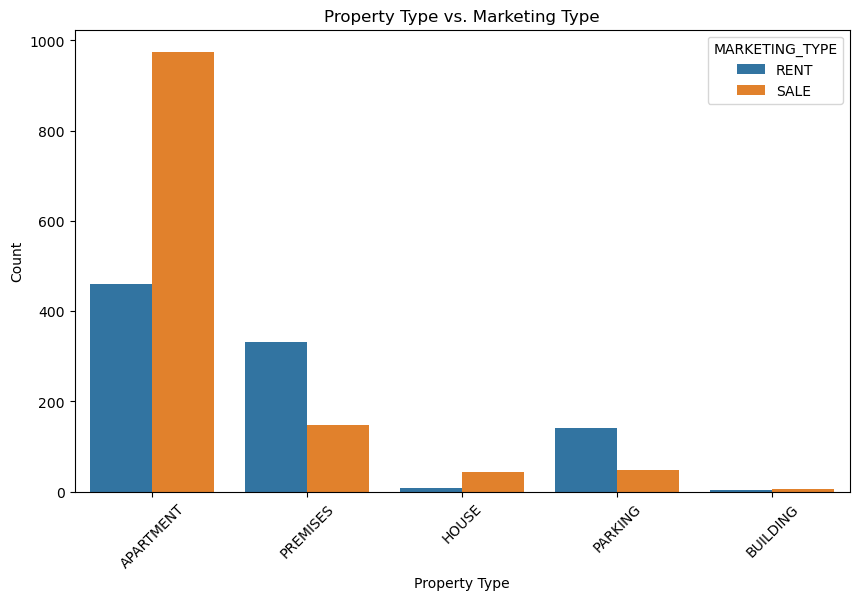

In [221]:

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PROPERTY_TYPE', hue='MARKETING_TYPE')

plt.title('Property Type vs. Marketing Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()




---
# **Traitement des valeurs manquantes**



Par la suite, je vais entreprendre le traitement des données manquantes pour deux variables essentielles, à savoir **la surface** et **le prix**. L'objectif est d'apporter des solutions pour combler les lacunes dans ces données, ce qui permettra d'améliorer la qualité et la fiabilité de notre analyse.

#### PRICE
Pour la variable 'PRICE', nous prévoyons d'utiliser la variable 'PRICE_EVENTS' afin d'extraire les informations de prix pertinentes et de les intégrer dans la variable 'price'.

In [222]:
print(df['PRICE'].isna().sum())
df['PRICE_EVENTS'].isna().sum()

60


0

In [223]:
df['PRICE_EVENTS'][0]

'[{"price":1979,"date":"2017-03-22"}]'

In [224]:
import json

df['PRICE_EVENTS'] = df['PRICE_EVENTS'].apply(json.loads)  # Parse JSON


In [225]:

def get_last_date_price(data):
    if data:
        last_date = max(data, key=lambda x: x['date'])
        return last_date['price']
    return None

df['pricenew'] = df['PRICE_EVENTS'].apply(get_last_date_price)

df['PRICE'].fillna(df['pricenew'], inplace=True)



In [226]:
df.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,3.0,NaN,False,NaN,True,1.0,[],COLLECTIVE,NaN,NaN,NaN,True,NaN,RENT,1979.0,27.49,"[{'price': 1979, 'date': '2017-03-22'}]",276.0,True,NaN,NaN,NaN,False,NaN,NaN,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,2017-04-21T18:52:35.733,NaN,1979.0
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,2.0,1.0,NaN,NaN,False,NaN,[],INDIVIDUAL,1.0,6.0,NaN,True,False,SALE,429000.0,8937.50,"[{'price': 452000.0, 'date': '2018-09-18'}, {'...",NaN,NaN,NaN,NaN,False,False,NaN,False,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,2019-06-06T10:08:10.89,2018-09-25,429000.0
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,6.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,4970000.0,18614.23,"[{'price': 4970000.0, 'date': '2019-02-19'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,2019-06-13T08:22:14.314,NaN,4970000.0
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,0.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,89.0,1.78,"[{'price': 89.0, 'date': '2018-07-06'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,2019-06-18T10:40:07.405,NaN,89.0
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,8.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,2790000.0,8454.55,"[{'price': 3150000.0, 'date': '2019-04-08'}, {...",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,2019-06-14T15:02:18.155,2019-06-14,2790000.0


#### Surface :
En ce qui concerne la variable 'Surface', j'ai tenté de remplir les valeurs manquantes en analysant les descriptions, cependant, cette approche n'a pas été très efficace. Le principal défi réside dans le fait que certaines descriptions ne fournissent pas de métrage exact, ce qui rend difficile la récupération précise de cette information. Nous devrons envisager d'autres méthodes ou approches pour améliorer la qualité des données relatives à la surface





---
# **Traitement des doublons**



Cette partie consiste à montrer la démarche prise pour traiter les doublons.

### Les doublons en fonction de la description

La première approche consiste à détecter les doublons en se basant sur les descriptions des annonces immobilières. En utilisant des techniques d'analyse textuelle et de correspondance de chaînes de caractères, nous cherchons des similitudes significatives entre les descriptions pour identifier les annonces potentiellement redondantes. Cela permet de réduire les doublons liés à des biens similaires ayant des descriptions identiques

In [227]:
id_descriptions_identiques = {}

for index, row in df.iterrows():
    description = row['DESCRIPTION']
    ID = row['ID']
    if description in id_descriptions_identiques:
        id_descriptions_identiques[description].append(ID)
    else:
        id_descriptions_identiques[description] = [ID]

paires_id_identiques = {description: IDs for description, IDs in id_descriptions_identiques.items() if len(IDs) > 1}

for description, IDs in paires_id_identiques.items():
    print(f"ID correspondants : {IDs}")
    print()


ID correspondants : ['44b6a5c0-3466-11e9-8213-25cc7d9bf5fc', '3df9b120-349b-11e9-8213-25cc7d9bf5fc']

ID correspondants : ['fd318b70-2c83-11e7-abba-c7678ee1d450', 'efae7070-7dec-11e7-823a-7b6be8c2c3cd', '09cbad40-6aec-11e9-8084-55ce2049f05c']

ID correspondants : ['b4201f40-a02c-11e9-a8e6-0de7b497e456', 'dd5ad750-a104-11e9-ab3e-47ec2b68d334']

ID correspondants : ['a5da5010-70aa-11e9-adc1-59e67c527828', '053396e0-c004-11e9-9fab-c3006e339e11', '6f4df390-6541-11e9-adc1-59e67c527828', '4b23fb50-73cd-11e9-adc1-59e67c527828']

ID correspondants : ['c255b140-b2a3-11e9-81e9-5f24299f2ef3', '3178e270-b38c-11e9-9fab-c3006e339e11', 'abce88b0-bd30-11e9-9fab-c3006e339e11', 'c5471700-b473-11e9-81e9-5f24299f2ef3']

ID correspondants : ['2a3d9e00-9470-11e9-ae15-9941b8f5de63', '98631ba0-9513-11e9-bba5-076f63900c40', '23524300-947c-11e9-ae15-9941b8f5de63']

ID correspondants : ['618ef810-b9cb-11e9-81e9-5f24299f2ef3', '5ee7cce0-b9cb-11e9-81e9-5f24299f2ef3']

ID correspondants : ['629f8d00-a1ca-11e9-a8e6-

Le code ci-dessus crée un dictionnaire pour stocker les identifiants correspondant à des descriptions d'annonces immobilières identiques dans le DataFrame df. La démarche consiste à parcourir les descriptions et à enregistrer les ID des annonces dont les descriptions sont identiques ou très similaires.

Ensuite, le code filtre les paires de descriptions identiques et affiche les ID correspondants. Cela permet d'identifier les annonces en double.

#### Exemple


In [228]:
ids_to_select = ['62b06d10-a363-11e9-aa5e-8b8909b4f047', '25e92490-a461-11e9-96d9-fb3253f8fc6c', 'd34cd5d0-a350-11e9-96d9-fb3253f8fc6c']
selected_rows = df[df['ID'].isin(ids_to_select)]
selected_rows


,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew
135,62b06d10-a363-11e9-aa5e-8b8909b4f047,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,False,LEVALLOIS / LOUISE MICHEL A deux pas du métro ...,"[""http://photo3.pericles.fr/photo_get.php?S1=3...",119.65,5.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,1260000.0,10530.71,"[{'price': 1260000.0, 'date': '2019-07-10'}]",NaN,NaN,NaN,NaN,False,False,NaN,False,Building Partners,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-10T22:38:04.062,2019-08-17T04:11:20.726,NaN,1260000.0
153,25e92490-a461-11e9-96d9-fb3253f8fc6c,https://www.bienici.com/annonce/pericles-25844170,BIEN_ICI,APARTMENT,False,LEVALLOIS / LOUISE MICHEL A deux pas du métro ...,"[""http://photo3.pericles.fr/photo_get.php?S1=3...",119.65,5.0,3.0,NaN,NaN,False,NaN,"[""ELECTRIC"",""UNDERFLOOR""]",COLLECTIVE,0.0,7.0,1960.0,True,True,SALE,1260000.0,10530.71,"[{'price': 1260000.0, 'date': '2019-07-12'}]",NaN,NaN,NaN,NaN,False,False,NaN,False,Building Partners,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-10T22:38:16.21,2019-08-18T19:20:20.983,NaN,1260000.0
1264,d34cd5d0-a350-11e9-96d9-fb3253f8fc6c,https://www.meilleursagents.com/annonces/achat...,MEILLEURS_AGENTS,APARTMENT,False,LEVALLOIS / LOUISE MICHEL A deux pas du métro ...,"[""https://pix.yanport.com/ads/d34cd5d0-a350-11...",120.00,5.0,3.0,NaN,NaN,True,1.0,[],COLLECTIVE,NaN,NaN,1960.0,True,False,SALE,1260000.0,10500.00,"[{'price': 1260000.0, 'date': '2019-07-10'}]",NaN,NaN,NaN,NaN,True,False,NaN,False,BUILDING PARTNERS LEVALLOIS PERRET,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-10T20:25:13.488,2019-08-17T02:46:30.957,NaN,1260000.0


In [229]:
df[df.index == 1891]

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew
1891,ee5ffce0-3991-11e9-8a1a-297fbcac27e2,https://www.seloger.com/annonces/investissemen...,SE_LOGER,APARTMENT,True,Une adresse de choix pour devenir propriétaire...,"[""https://pix.yanport.com/ads/ee5ffce0-3991-11...",60.72,3.0,NaN,NaN,NaN,False,NaN,[],NaN,3.0,NaN,NaN,NaN,NaN,SALE,704000.0,11594.2,"[{'price': 704000.0, 'date': '2019-02-26'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,False,BNP Paribas Immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-26T06:44:12.986,2019-08-08T01:47:56.538,NaN,704000.0


In [230]:
df[df.index == 234]

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew
234,eccb2c10-3991-11e9-bcc5-398e90638db6,https://www.seloger.com/annonces/investissemen...,SE_LOGER,APARTMENT,True,Une adresse de choix pour devenir propriétaire...,"[""https://pix.yanport.com/ads/eccb2c10-3991-11...",60.72,3.0,NaN,NaN,NaN,False,NaN,[],NaN,1.0,NaN,NaN,NaN,NaN,SALE,626000.0,10309.62,"[{'price': 626000.0, 'date': '2019-02-26'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,False,BNP Paribas Immobilier,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-26T06:44:10.451,2019-08-24T08:38:06.029,NaN,626000.0


Comme illustré dans l'exemple, l'approche actuelle basée sur la comparaison des descriptions peut se révéler inefficace, car elle peut identifier des doublons même lorsque deux annonces partagent des descriptions similaires sans pour autant représenter le même bien. Ceci peut survenir lorsque des agences utilisent des descriptions standardisées ou lorsqu'il s'agit de biens situés dans le même bâtiment, ce qui peut conduire à des résultats incorrects en matière de détection de doublons.

### Approche par SURFACE et PRICE

Suite à notre tentative de traitement basée sur la description, il est devenu évident que l'ordre de choix des variables est d'une importance capitale. Nous avons décidé de débuter en priorisant les variables qui apportent une distinction significative entre les annonces, puis d'ajouter la description comme dernière étape. Cette approche nous permettra d'aborder d'abord les caractéristiques clés des annonces pour réduire les doublons de manière plus efficace, avant de traiter les descriptions qui peuvent être plus sujettes à des similitudes.

Par conséquent, nous allons débuter notre processus de dédoublonnage en nous concentrant en premier lieu sur les variables **PRICE** et **SURFACE**. Ces deux variables sont prioritaires, car elles ont un fort impact sur la distinction entre les annonces immobilières. 

In [231]:
df[["SURFACE","PRICE"]].isna().sum()

SURFACE    114
PRICE        0
dtype: int64

Après avoir traité les valeurs manquantes de la variable 'PRICE', nous avons envisagé une approche similaire pour la variable 'SURFACE', en nous basant sur la description des annonces. Cependant, en raison de la complexité des informations textuelles et du risque d'inefficacité, nous avons finalement décidé de séparer la partie de la base de données contenant des valeurs manquantes pour la variable 'SURFACE' et de la traiter ultérieurement.

In [232]:
df_without_missing_surface = df.dropna(subset=['SURFACE'])

df_missing_surface = df[df['SURFACE'].isna()]

print("Base de données sans valeurs manquantes dans 'SURFACE':")
print(df_without_missing_surface.shape)

print("\nBase de données avec valeurs manquantes dans 'SURFACE':")
print(df_missing_surface.shape)


Base de données sans valeurs manquantes dans 'SURFACE':
(2050, 43)

Base de données avec valeurs manquantes dans 'SURFACE':
(114, 43)


In [233]:
df_missing_surface["DEALER_TYPE"].value_counts()

AGENCY       101
PRIVATE       12
MANDATARY      1
Name: DEALER_TYPE, dtype: int64

#### PRIVATE / OTHER

Les prochaines variables que nous prévoyons d'ajouter à notre processus de dédoublonnage sont la **DESCRIPTION** et le **DEALER_NAME**. Cependant, nous avons pris en compte le fait que le nom du vendeur (DEALER_NAME) n'est pas toujours pertinent lorsqu'il s'agit de particuliers, et nous avons donc décidé de diviser nos données en fonction du type de vendeur. Cela nous permettra de personnaliser notre approche de dédoublonnage en fonction des caractéristiques spécifiques aux professionnels de l'immobilier et aux particuliers, optimisant ainsi la précision de notre processus de nettoyage des données.

In [234]:
private_dealer_data = df_without_missing_surface[df_without_missing_surface['DEALER_TYPE'] == 'PRIVATE']


In [235]:
print(private_dealer_data.shape)
print(other_dealer_data.shape)
print(df_without_missing_surface.shape)

(189, 43)
(1023, 45)
(2050, 43)


### PRIVATE_DEALER

Le code ci-dessous crée une nouvelle variable appelée 'GROUP_ID' dans laquelle les annonces sont regroupées en fonction de deux critères : le prix et la surface. Cela signifie que les annonces ayant le même prix et la même surface se verront attribuer le même 'GROUP_ID'. Cette nouvelle variable 'GROUP_ID' est utilisée pour identifier les groupes d'annonces qui partagent ces caractéristiques communes

In [236]:
private_dealer_data['GROUP_ID'] = private_dealer_data.groupby(['SURFACE', 'PRICE']).ngroup()

Ensuite, pour simplifier davantage le processus de dédoublonnage, nous attribuerons le 'GROUP_ID' '0' aux annonces qui n'ont pas de doublons. Cela permettra de les regrouper de manière à ne pas avoir à les traiter à nouveau ultérieurement, car elles ne présentent pas de doublons apparents.

In [237]:
group_counts = private_dealer_data['GROUP_ID'].value_counts()

single_observation_groups = group_counts[group_counts == 1].index

private_dealer_data.loc[private_dealer_data['GROUP_ID'].isin(single_observation_groups), 'GROUP_ID'] = 0


In [238]:
private_dealer_data["GROUP_ID"].value_counts()

0      134
23       5
3        4
22       3
69       3
100      3
24       3
134      3
97       3
14       2
74       2
18       2
19       2
29       2
56       2
38       2
99       2
68       2
101      2
49       2
124      2
108      2
58       2
Name: GROUP_ID, dtype: int64

In [239]:
private_dealer_data.dropna(subset = "DESCRIPTION",inplace = True)

Après avoir effectué la première étape de regroupement en se basant sur le 'GROUP_ID' pour les annonces partageant le même prix et la même surface, nous passerons à une deuxième phase de regroupement basée sur la description. Cette fois, nous utiliserons la bibliothèque 'difflib' pour évaluer la similarité entre les descriptions des annonces. Les annonces qui partagent des informations similaires mais qui peuvent ne pas avoir exactement la même forme seront regroupées en utilisant un seuil de similarité de 60%. Cela nous permettra d'identifier les annonces qui se ressemblent même si elles ne correspondent pas exactement.

Pour ce faire, on crée une nouvelle variable **SIMILAR_GROUP_ID** qui est composée du GROUP_ID suivi par '.' et une lettre.

In [240]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

similarity_threshold = 0.60

assigned_ids = {}
current_letter = 'a'

for group_id in private_dealer_data['GROUP_ID'].unique():
    if group_id == 0:
        continue  # Skip GROUP_ID 0
    group_data = private_dealer_data[private_dealer_data['GROUP_ID'] == group_id]
    descriptions = group_data['DESCRIPTION'].tolist()

    for i in range(len(descriptions)):
        for j in range(i + 1, len(descriptions)):
            description1 = descriptions[i]
            description2 = descriptions[j]
            similarity = similar(description1, description2)

            if similarity >= similarity_threshold:
                if group_id not in assigned_ids:
                    assigned_ids[group_id] = f"{group_id}.{current_letter}"
                    current_letter = chr(ord(current_letter) + 1)
                assigned_ids[group_data.index[i]] = assigned_ids[group_id]
                assigned_ids[group_data.index[j]] = assigned_ids[group_id]

private_dealer_data['SIMILAR_GROUP_ID'] = private_dealer_data.index.map(assigned_ids)


In [241]:
private_dealer_data

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID,SIMILAR_GROUP_ID
8,bc076370-45ec-11e9-a00a-897941d6ca9c,https://www.leboncoin.fr/locations/1583612210.htm,LE_BON_COIN,PARKING,NaN,LOUE place de parking dans résidence de standi...,"[""https://pix.yanport.com/ads/bc076370-45ec-11...",11.0,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,100.0,9.09,"[{'price': 90.0, 'date': '2019-03-14'}, {'pric...",NaN,True,NaN,NaN,NaN,False,False,NaN,baudoin,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-03-14T00:04:24.651,2019-07-13T11:03:51.699,NaN,100.0,14,NaN
19,f765b680-4f47-11e7-a736-176db429eda3,http://www.leboncoin.fr/locations/1137787277.h...,LE_BON_COIN,APARTMENT,NaN,2 pièces 61 m2 haut standing + Parking + Cave ...,"[""http://img5.leboncoin.fr/ad-image/f839eb2a03...",61.0,2.0,NaN,False,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,1690.0,27.70,"[{'price': 1690, 'date': '2017-05-20'}]",NaN,True,NaN,NaN,NaN,False,False,NaN,gilles,PRIVATE,54178039,Levallois-Perret,92300.0,92,2017-05-20T07:27:53.801,2017-06-12T08:20:16.895,NaN,1690.0,134,134.a
20,9b020540-3531-11e7-bca4-f98c9ca94282,http://www.leboncoin.fr/ventes_immobilieres/11...,LE_BON_COIN,APARTMENT,False,"Levallois-Perret Centre, appartement familial,...","[""http://img1.leboncoin.fr/ad-image/2362d8ce41...",100.0,3.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,982300.0,9823.00,"[{'price': 982300, 'date': '2017-05-10'}]",NaN,NaN,NaN,NaN,NaN,False,False,NaN,VS,PRIVATE,54178039,Levallois-Perret,92300.0,92,2017-05-10T03:34:39.322,2017-05-13T19:01:36.444,NaN,982300.0,0,NaN
21,8f01f7f0-3531-11e7-bca4-f98c9ca94282,http://www.leboncoin.fr/ventes_immobilieres/11...,LE_BON_COIN,APARTMENT,False,"Au coeur de Levallois-Perret, appartement fami...","[""http://img7.leboncoin.fr/ad-image/1aa0c004ce...",100.0,4.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,1031000.0,10310.00,"[{'price': 1031000, 'date': '2017-05-10'}]",NaN,NaN,NaN,NaN,NaN,False,False,NaN,VS,PRIVATE,54178039,Levallois-Perret,92300.0,92,2017-05-10T03:34:20.589,2017-05-13T19:02:03.757,NaN,1031000.0,0,NaN
27,fd2843a0-9fa7-11e9-ab3e-47ec2b68d334,https://www.leboncoin.fr/locations/1641959648.htm,LE_BON_COIN,PARKING,NaN,Bonjour je loue mon parking situé rue Victor H...,"[""https://img0.leboncoin.fr/ad-image/9d79ea778...",10.0,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,100.0,10.00,"[{'price': 100.0, 'date': '2019-07-06'}]",NaN,True,NaN,NaN,NaN,False,False,NaN,Souleyman,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-07-06T04:38:45.242,2019-07-21T08:42:07.59,NaN,100.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,8b4bc150-b5d5-11e9-81e9-5f24299f2ef3,https://www.pap.fr/annonces/appartement-levall...,PAP,APARTMENT,False,Charmant studio refait a neuf Situé à 7 minute...,"[""https://pix.yanport.com/ads/8b4bc150-b5d5-11...",17.0,1.0,1.0,True,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,850.0,50.00,"[{'price': 850.0, 'date': '2019-08-03'}]",NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-08-03T10:00:32.082,2019-08-25T13:20:56.426,NaN,850.0,49,NaN
2115,e25b4110-49aa-11e9-ba7a-0ff7ef4fe44b,https://www.seloger.com/annonces/achat-de-pres...,SE_LOGER,HOUSE,False,"En plein coeur de Levallois, quartier Villiers...","[""https://v.seloger.com/s/width/800/visuels/1/...",290.0,6.0,5.0,NaN,1.0,False,NaN,[],NaN,0.0,NaN,NaN,NaN,NaN,SALE,3269000.0,11272.41,"[{'price': 342

In [242]:
private_dealer_data["SIMILAR_GROUP_ID"].value_counts()

134.a    3
97.d     3
124.b    2
99.c     2
29.e     2
18.f     2
Name: SIMILAR_GROUP_ID, dtype: int64

 Pour les annonces qui ont été identifiées comme des doublons, nous effectuons une fusion des données en comparant les variables de chaque paire d'annonces. Lorsqu'une variable est nulle pour l'une des annonces et non pour l'autre, nous choisissons de conserver la valeur non nulle. Cette fusion minutieuse nous permet de combiner les informations de manière à ce que chaque variable soit renseignée autant que possible dans l'annonce consolidée. Ainsi, nous obtenons une représentation complète de chaque bien immobilier en éliminant les doublons tout en préservant le maximum d'informations.
 
Pour trois variables spécifiques, à savoir l'URL de l'annonce, la source du crawl et les images, nous choisissons de conserver toutes les valeurs disponibles. Cela nous permet de suivre la publication de l'annonce sur différents sites, tout en garantissant la préservation de l'intégralité des images associées à chaque annonce. Cette approche nous aide à obtenir une vue complète de la diffusion de l'annonce et à conserver toutes les ressources visuelles pertinentes liées au bien immobilier

In [243]:

def aggregate_values(series):
    non_null_values = [v for v in series if pd.notna(v)]
    if non_null_values:
        return random.choice(non_null_values)
    else:
        return np.nan

columns_to_aggregate = [col for col in private_dealer_data.columns if col != 'SIMILAR_GROUP_ID']

agg_dict = {}

for col in columns_to_aggregate:
    if col in ['CRAWL_SOURCE', 'URL', 'IMAGES']:
        agg_dict[col] = list
    else:
        agg_dict[col] = aggregate_values

combined_private_dealer_data = private_dealer_data.groupby('SIMILAR_GROUP_ID').agg(agg_dict)

combined_private_dealer_data.reset_index(inplace=True)




In [244]:
combined_private_dealer_data

,SIMILAR_GROUP_ID,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID
0,124.b,a57a8ad0-c7f4-11e9-92d3-cb429fb9e457,[https://www.leboncoin.fr/ventes_immobilieres/...,"[LE_BON_COIN, PAP]",APARTMENT,False,"Appartement de 53 m², situé au 8ème et dernier...","[[""https://pix.yanport.com/ads/26995180-c7de-1...",53.0,2.0,1.0,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,495000.0,9339.62,"[{'price': 495000.0, 'date': '2019-08-26'}]",NaN,NaN,NaN,NaN,NaN,False,False,False,sil,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-08-26T08:47:32.634,2019-08-26T11:28:17.332,NaN,495000.0,124
1,134.a,17547da0-4d13-11e7-a736-176db429eda3,[http://www.leboncoin.fr/locations/1137787277....,"[LE_BON_COIN, LE_BON_COIN, LE_BON_COIN]",APARTMENT,False,2 pi?ces 61 m2 haut standing + Parking + Cave ...,"[[""http://img5.leboncoin.fr/ad-image/f839eb2a0...",61.0,2.0,NaN,False,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,1690.0,27.70,"[{'price': 1690, 'date': '2017-05-20'}]",NaN,True,NaN,NaN,NaN,False,False,NaN,gilles,PRIVATE,54178039,Levallois-Perret,92300.0,92,2017-05-20T07:27:53.801,2017-06-12T08:20:16.895,NaN,1690.0,134
2,18.f,422ddd00-8731-11e9-a7f2-f5443208fc78,[https://www.paruvendu.fr/immobilier/location/...,"[PARU_VENDU, EXPLORIMMO]",APARTMENT,False,STUDIO DE 11m2 À LOUER À LEVALLOIS-PERRET REZ ...,"[[""https://media.paruvendu.fr/media-pa/WI16/2/...",11.0,1.0,1.0,True,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,750.0,68.18,"[{'price': 750.0, 'date': '2019-06-05'}]",30.0,True,NaN,NaN,NaN,False,False,NaN,NaN,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-06-05T01:28:41.573,2019-08-27T11:26:17.596,NaN,750.0,18
3,29.e,43ccf7d0-c35a-11e9-9fab-c3006e339e11,[https://www.pap.fr/annonces/appartement-leval...,"[PAP, LE_BON_COIN]",APARTMENT,False,Refait entièrement à neuf par Architecte d'Int...,"[[""https://static.pap.fr/photos/C84/C84A0057.j...",12.0,1.0,NaN,NaN,NaN,False,NaN,[],INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,SALE,119000.0,9916.67,"[{'price': 119000.0, 'date': '2019-08-20'}]",NaN,NaN,NaN,NaN,NaN,False,False,False,fanny,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-08-20T15:26:35.166,2019-08-20T15:26:35.166,NaN,119000.0,29
4,97.d,244d5ef0-c2aa-11e9-9fab-c3006e339e11,[https://www.leboncoin.fr/locations/1660064845...,"[LE_BON_COIN, SE_LOGER, PARU_VENDU]",APARTMENT,False,Rue danton à proximité immédiate de toutes com...,"[[""https://pix.yanport.com/ads/345937f0-bf72-1...",36.0,2.0,1.0,True,NaN,False,NaN,[],INDIVIDUAL,NaN,5.0,NaN,NaN,NaN,RENT,1200.0,33.33,"[{'price': 1200.0, 'date': '2019-08-15'}]",NaN,True,NaN,NaN,NaN,False,False,NaN,Eric,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-08-16T11:34:00,2019-08-23T18:02:17.335,NaN,1200.0,97
5,99.c,e3a190c0-a9b2-11e9-96d9-fb3253f8fc6c,[https://www.leboncoin.fr/ventes_immobilieres/...,"[LE_BON_COIN, PARU_VENDU]",APARTMENT,False,"Vend Studio de 36 m2 à Levallois-Perret, idéal...","[[""https://pix.yanport.com/ads/e3a190c0-a9b2-1...",36.0,1.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,425000.0,11805.56,"[{'price': 425000.0, 'date': '2019-07-18'}]",NaN,NaN,NaN,NaN,NaN,False,True,False,levallois92,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-07-18T23:22:18.446,2019-08-03T02:41:14.822,NaN,425000.0,99


In [245]:
combined_private_dealer_data["SIMILAR_GROUP_ID"].value_counts()

124.b    1
134.a    1
18.f     1
29.e     1
97.d     1
99.c     1
Name: SIMILAR_GROUP_ID, dtype: int64

In [246]:
combined_private_dealer_data.shape

(6, 45)

##### Un exemple 

##### Avant

In [247]:
private_dealer_data[private_dealer_data["SIMILAR_GROUP_ID"]== "18.f"]

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID,SIMILAR_GROUP_ID
1460,422ddd00-8731-11e9-a7f2-f5443208fc78,https://www.paruvendu.fr/immobilier/location/s...,PARU_VENDU,APARTMENT,False,Studio meublÉ levallois perret STUDIO DE 11m2 ...,"[""https://media.paruvendu.fr/media-pa/WI16/2/1...",11.0,1.0,1.0,True,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,750.0,68.18,"[{'price': 750.0, 'date': '2019-06-05'}]",NaN,True,NaN,NaN,NaN,False,False,NaN,NaN,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-06-05T01:28:41.573,2019-08-27T11:26:17.596,NaN,750.0,18,18.f
1929,abd64db0-8776-11e9-8a42-a16638394d93,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,False,STUDIO DE 11m2 À LOUER À LEVALLOIS-PERRET REZ ...,"[""https://pix.yanport.com/ads/abd64db0-8776-11...",11.0,1.0,NaN,True,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,750.0,68.18,"[{'price': 750.0, 'date': '2019-06-05'}]",30.0,True,NaN,NaN,NaN,False,False,NaN,NaN,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-06-05T09:45:33.273,2019-08-13T04:01:20.597,NaN,750.0,18,18.f


#### Après

In [248]:
combined_private_dealer_data[combined_private_dealer_data["SIMILAR_GROUP_ID"]== "18.f"]

,SIMILAR_GROUP_ID,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID
2,18.f,422ddd00-8731-11e9-a7f2-f5443208fc78,[https://www.paruvendu.fr/immobilier/location/...,"[PARU_VENDU, EXPLORIMMO]",APARTMENT,False,STUDIO DE 11m2 À LOUER À LEVALLOIS-PERRET REZ ...,"[[""https://media.paruvendu.fr/media-pa/WI16/2/...",11.0,1.0,1.0,True,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,750.0,68.18,"[{'price': 750.0, 'date': '2019-06-05'}]",30.0,True,NaN,NaN,NaN,False,False,NaN,NaN,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-06-05T01:28:41.573,2019-08-27T11:26:17.596,NaN,750.0,18


Les annonces qui ne sont pas identifiées comme des doublons et qui ont un 'similar_group_id' nul sont ensuite ajoutées à la suite du processus de dédoublonnage. Cette étape permet d'intégrer ces annonces uniques dans l'ensemble de données consolidé.

In [249]:
#Data avec Nan
private_dealer_data = private_dealer_data[private_dealer_data['SIMILAR_GROUP_ID'].isna()]

private_dealer_data.shape


(171, 45)

In [250]:

merged_private_dealer_data = pd.concat([private_dealer_data, combined_private_dealer_data], ignore_index=True)


###### *merged_private_dealer_data est la base de données contenant les particuliers

### OTHER_DEALERS

Pour les autres vendeurs, nous allons suivre une démarche similaire, à l'exception que cette fois, nous allons également regrouper les annonces en fonction du 'Dealer_name'. Cela signifie que pour chaque vendeur, nous allons identifier les annonces en doublon en utilisant à la fois **PRICE**, **SURFACE** et **DESCRIPTION**, ainsi que le nom du vendeur (**DEALER_NAME**).

In [252]:
other_dealer_data = df_without_missing_surface[df_without_missing_surface['DEALER_TYPE'] != 'PRIVATE']

In [253]:
other_dealer_data['GROUP_ID'] = other_dealer_data.groupby(['SURFACE', 'PRICE']).ngroup()

In [254]:
group_counts = other_dealer_data['GROUP_ID'].value_counts()

single_observation_groups = group_counts[group_counts == 1].index

other_dealer_data.loc[other_dealer_data['GROUP_ID'].isin(single_observation_groups), 'GROUP_ID'] = 0


In [255]:
other_dealer_data["GROUP_ID"].value_counts()

0      676
606     11
939     10
722     10
585      8
      ... 
955      2
167      2
453      2
436      2
459      2
Name: GROUP_ID, Length: 370, dtype: int64

In [256]:
other_dealer_data.dropna(subset = "DESCRIPTION",inplace = True)

In [257]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

description_similarity_threshold = 0.60  
dealer_name_similarity_threshold = 0.30  

assigned_ids = {}
current_letter = 'a'

for group_id in other_dealer_data['GROUP_ID'].unique():
    if group_id == 0:
        continue  
    group_data = other_dealer_data[other_dealer_data['GROUP_ID'] == group_id]
    descriptions = group_data['DESCRIPTION'].tolist()
    dealer_names = group_data['DEALER_NAME'].tolist()

    for i in range(len(descriptions)):
        for j in range(i + 1, len(descriptions)):
            description1 = descriptions[i]
            dealer_name1 = dealer_names[i]
            description2 = descriptions[j]
            dealer_name2 = dealer_names[j]

            description_similarity = similar(description1, description2)
            dealer_name_similarity = similar(dealer_name1, dealer_name2)

            if (
                description_similarity >= description_similarity_threshold
                and dealer_name_similarity >= dealer_name_similarity_threshold
            ):
                if group_id not in assigned_ids:
                    assigned_ids[group_id] = f"{group_id}.{current_letter}"
                    current_letter = chr(ord(current_letter) + 1)
                assigned_ids[group_data.index[i]] = assigned_ids[group_id]
                assigned_ids[group_data.index[j]] = assigned_ids[group_id]

other_dealer_data['SIMILAR_GROUP_ID'] = other_dealer_data.index.map(assigned_ids)


In [258]:
other_dealer_data.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID,SIMILAR_GROUP_ID
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,3.0,NaN,False,NaN,True,1.0,[],COLLECTIVE,NaN,NaN,NaN,True,NaN,RENT,1979.0,27.49,"[{'price': 1979, 'date': '2017-03-22'}]",276.0,True,NaN,NaN,NaN,False,NaN,NaN,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,2017-04-21T18:52:35.733,NaN,1979.0,0,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,2.0,1.0,NaN,NaN,False,NaN,[],INDIVIDUAL,1.0,6.0,NaN,True,False,SALE,429000.0,8937.50,"[{'price': 452000.0, 'date': '2018-09-18'}, {'...",NaN,NaN,NaN,NaN,False,False,NaN,False,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,2019-06-06T10:08:10.89,2018-09-25,429000.0,0,NaN
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,6.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,4970000.0,18614.23,"[{'price': 4970000.0, 'date': '2019-02-19'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,2019-06-13T08:22:14.314,NaN,4970000.0,912,912.a
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,0.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,89.0,1.78,"[{'price': 89.0, 'date': '2018-07-06'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,2019-06-18T10:40:07.405,NaN,89.0,400,400.b
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,8.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,2790000.0,8454.55,"[{'price': 3150000.0, 'date': '2019-04-08'}, {...",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,2019-06-14T15:02:18.155,2019-06-14,2790000.0,939,939.c


In [259]:
other_dealer_data["SIMILAR_GROUP_ID"].value_counts()

606.h    33
441.¸    19
826.}    18
764.    17
894.q    17
         ..
596.ö     2
483.«     2
462.w     2
167.ý     2
132.Ð     2
Name: SIMILAR_GROUP_ID, Length: 201, dtype: int64

In [260]:
other_dealer_data[other_dealer_data["SIMILAR_GROUP_ID"]== '483.«']

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID,SIMILAR_GROUP_ID
229,5abce2a0-8eaf-11e9-a7f2-f5443208fc78,https://www.seloger.com/annonces/locations/app...,SE_LOGER,APARTMENT,False,Proche du centre et de la gare de Clichy Leval...,"[""https://pix.yanport.com/ads/5abce2a0-8eaf-11...",56.67,2.0,1.0,False,NaN,False,NaN,[],INDIVIDUAL,4.0,7.0,NaN,NaN,True,RENT,1140.0,20.12,"[{'price': 1138.0, 'date': '2019-06-14'}, {'pr...",96.0,True,NaN,NaN,NaN,False,NaN,NaN,In'li,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-06-14T14:18:59.312,2019-08-21T23:36:47.158,NaN,1140.0,483,483.«
259,6cdd5780-6dee-11e9-8084-55ce2049f05c,https://www.seloger.com/annonces/locations/app...,SE_LOGER,APARTMENT,False,Proche du centre et de la gare de Clichy Leval...,"[""https://pix.yanport.com/ads/6cdd5780-6dee-11...",56.67,2.0,1.0,False,NaN,False,NaN,[],INDIVIDUAL,2.0,7.0,NaN,NaN,True,RENT,1140.0,20.12,"[{'price': 1138.0, 'date': '2019-05-03'}, {'pr...",96.0,True,NaN,NaN,NaN,False,NaN,NaN,In'li,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-05-03T21:57:19.756,2019-08-20T20:15:20.203,NaN,1140.0,483,483.«


In [261]:
#Data_avec_NA
other_dealer_data_na = other_dealer_data[other_dealer_data['SIMILAR_GROUP_ID'].isna()]

other_dealer_data_na.shape


(838, 45)

In [262]:

def aggregate_values(series):
    non_null_values = series.tolist()
    if non_null_values:
        return random.choice(non_null_values)
    else:
        return np.nan

agg_dict = {}

for col in columns_to_aggregate:
    if col in ['CRAWL_SOURCE', 'URL', 'IMAGES']:
        agg_dict[col] = list
    else:
        agg_dict[col] = aggregate_values

other_dealer_data.dropna(subset = "SIMILAR_GROUP_ID", inplace = True)
combined_other_dealer_data = other_dealer_data.groupby('SIMILAR_GROUP_ID').agg(agg_dict)

combined_other_dealer_data.reset_index(inplace=True)


In [263]:
combined_other_dealer_data

,SIMILAR_GROUP_ID,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID
0,1012.Â,3a571b30-b26c-11e9-81e9-5f24299f2ef3,[https://www.seloger.com/annonces/locations/bu...,"[SE_LOGER, SE_LOGER, SE_LOGER]",PREMISES,False,"A proximité de la gare ""Clichy-Levallois"" sur ...","[[""https://v.seloger.com/s/width/800/visuels/0...",1133.00,3.0,NaN,NaN,NaN,False,NaN,[],NaN,1.0,6.0,NaN,NaN,True,SALE,770000.0,8484.85,"[{'price': 29265.0, 'date': '2019-07-30'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Evolis Idf Ouest,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-30T01:49:07.898,2019-08-27T00:31:57.195,NaN,770000.0,1012
1,110.Ć,97584f90-c46c-11e9-92d3-cb429fb9e457,[https://immobilier.lefigaro.fr/annonces/annon...,"[EXPLORIMMO, SE_LOGER, LOGIC_IMMO]",APARTMENT,False,"38 rue Pierre Brossolette, dans immeuble ancie...","[[""https://pix.yanport.com/ads/e997f670-bb57-1...",11.00,1.0,NaN,NaN,NaN,False,NaN,[],COLLECTIVE,6.0,NaN,NaN,NaN,NaN,RENT,75.0,6.82,"[{'price': 75.0, 'date': '2019-08-10'}]",NaN,True,NaN,NaN,NaN,True,NaN,NaN,Opimmo,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-08-21T16:14:15.452,2019-08-21T16:14:15.452,NaN,868.0,110
2,113.ć,91132270-ae39-11e9-81e9-5f24299f2ef3,[https://www.seloger.com/annonces/locations/ap...,"[SE_LOGER, EXPLORIMMO]",APARTMENT,False,Levallois-Perret - Studio meublé Ce studio meu...,"[[""https://pix.yanport.com/ads/91132270-ae39-1...",26.92,1.0,NaN,True,NaN,False,NaN,[],NaN,NaN,NaN,NaN,True,True,RENT,1300.0,48.29,"[{'price': 1300.0, 'date': '2019-07-24'}]",130.0,True,2340.0,NaN,NaN,False,NaN,NaN,Daniel Feau Neuilly Location,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-24T17:36:26.611,2019-08-16T11:42:23.833,NaN,1300.0,113
3,117.Ã,ed921aa0-ae76-11e9-9fab-c3006e339e11,[https://www.meilleursagents.com/annonces/loca...,"[MEILLEURS_AGENTS, SE_LOGER, EXPLORIMMO, BIEN_...",APARTMENT,False,"LEVALLOIS, dans un bel immeuble de 'standing' ...","[[""http://thumbor.meilleursagents.com/ghj1n1Kl...",27.00,2.0,1.0,False,1.0,False,NaN,[],INDIVIDUAL,1.0,NaN,NaN,NaN,NaN,RENT,903.0,37.33,"[{'price': 903.0, 'date': '2018-12-12'}]",30.0,True,3160.0,675.0,NaN,False,NaN,NaN,Agence Comimob,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-12-12T14:42:35.295,2019-08-27T08:33:33.108,NaN,903.0,117
4,119.s,4029bff0-c387-11e9-9fab-c3006e339e11,[https://www.logic-immo.com/detail-location-c2...,"[LOGIC_IMMO, SE_LOGER, EXPLORIMMO, LE_BON_COIN...",PARKING,False,"Rue Louis Rouquier, une place de parking au se...","[[""https://mmf.logic-immo.com/mmf/ads/photo-pr...",27.00,2.0,NaN,NaN,NaN,False,NaN,[],NaN,5.0,NaN,NaN,NaN,NaN,RENT,1050.0,38.89,"[{'price': 125.0, 'date': '2019-08-21'}]",15.0,True,NaN,150.0,NaN,False,NaN,NaN,Mister Property,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-08-21T05:58:04.544,2019-08-14T15:33:22.531,2019-07-30,1050.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,939.c,868fe370-72d8-11e9-8084-55ce2049f05c,[https://www.bellesdemeures.com/annonces/vente...,"[BELLES_DEMEURES, SE_LOGER, LOGIC_IMMO, LOGIC_...",HOUSE,False,LEVALLOIS - PERRET – MAIRIE – Maison d'archite...,"[[""https://v.seloger.com/s/width/966/visuels/0...",330.00,8.0,NaN,NaN,1.0,False,NaN,[],NaN,0.0,NaN,NaN,NaN,NaN,SALE,2790000.0,8454.55,"[{'price': 2980000.0, 'date': '2019-05-10'}, {...",NaN,NaN,NaN,NaN,False,False,NaN,False,Daniel Féau - Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-09T07:52:59.117,2019-08-14T10:01:10.519,2019-06-14,2790000.0,

In [264]:
combined_other_dealer_data["SIMILAR_GROUP_ID"].value_counts()

1012.Â    1
710.ď     1
648.     1
653.{     1
669.     1
         ..
405.÷     1
408.     1
410.Ç     1
413.õ     1
987.     1
Name: SIMILAR_GROUP_ID, Length: 201, dtype: int64

In [265]:
combined_other_dealer_data.shape

(201, 45)

Un exemple apres consolidation

In [266]:
other_dealer_data[other_dealer_data["SIMILAR_GROUP_ID"]== "1012.Â"]

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID,SIMILAR_GROUP_ID
311,14318290-c862-11e9-a6b2-651beb16710e,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"A proximité de la gare ""Clichy-Levallois"" sur ...","[""https://v.seloger.com/s/width/800/visuels/0/...",1133.00,0.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,29265.0,25.83,"[{'price': 29265.0, 'date': '2019-08-27'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Evolis Idf Ouest,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-08-26T20:57:00,2019-08-27T00:31:57.195,NaN,29265.0,1012,1012.Â
1012,ce93c020-b49f-11e9-81e9-5f24299f2ef3,https://www.seloger.com/annonces/achat/apparte...,SE_LOGER,APARTMENT,False,LEVALLOIS | PONT DE LEVALLOIS | 3 PIÈCES ou 4 ...,"[""https://pix.yanport.com/ads/ce93c020-b49f-11...",90.75,3.0,2.0,NaN,NaN,False,NaN,"[""GAS""]",COLLECTIVE,1.0,6.0,1970.0,True,True,SALE,770000.0,8484.85,"[{'price': 770000.0, 'date': '2019-08-01'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Building Partners,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-08-01T18:38:00,2019-08-24T03:58:19.901,NaN,770000.0,0,1012.Â
1381,3a571b30-b26c-11e9-81e9-5f24299f2ef3,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"A proximité de la gare ""Clichy-Levallois"" sur ...","[""https://v.seloger.com/s/width/800/visuels/0/...",1133.00,0.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,29265.0,25.83,"[{'price': 29265.0, 'date': '2019-07-30'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Evolis Idf Ouest,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-30T01:49:07.898,2019-08-21T06:42:38.713,NaN,29265.0,1012,1012.Â


In [268]:

merged_other_dealer_data = pd.concat([other_dealer_data_na, combined_other_dealer_data], ignore_index=True)


In [269]:
merged_other_dealer_data[merged_other_dealer_data['SIMILAR_GROUP_ID'] == '1012.Â']

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,pricenew,GROUP_ID,SIMILAR_GROUP_ID
838,3a571b30-b26c-11e9-81e9-5f24299f2ef3,[https://www.seloger.com/annonces/locations/bu...,"[SE_LOGER, SE_LOGER, SE_LOGER]",PREMISES,False,"A proximité de la gare ""Clichy-Levallois"" sur ...","[[""https://v.seloger.com/s/width/800/visuels/0...",1133.0,3.0,NaN,NaN,NaN,False,NaN,[],NaN,1.0,6.0,NaN,NaN,True,SALE,770000.0,8484.85,"[{'price': 29265.0, 'date': '2019-07-30'}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Evolis Idf Ouest,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-30T01:49:07.898,2019-08-27T00:31:57.195,NaN,770000.0,1012,1012.Â


### Merging the 2 databases

Après avoir achevé le processus de dédoublonnage pour les annonces de professionnels et les annonces de particuliers, nous prévoyons de fusionner les deux bases de données

In [300]:
merged_private_dealer_data.shape

(177, 45)

In [301]:
merged_other_dealer_data.shape

(1039, 45)

In [402]:
Final_Data = pd.concat([merged_other_dealer_data, merged_private_dealer_data], ignore_index=True)

In [403]:
Final_Data.shape

(1216, 45)

In [404]:

Final_Data = Final_Data.drop(['SIMILAR_GROUP_ID', 'GROUP_ID','pricenew'], axis=1)



Le code ci-dessous est utilisé pour supprimer les doublons dans les 3 variables : CRAWL_SOURCE, URL et IMAGES


In [406]:
def process_column(col):
    if isinstance(col, list):
        if len(col) == 1:
            return col[0]
        else:
            seen = set()
            result = []
            for item in col:
                if item not in seen:
                    seen.add(item)
                    result.append(item)
            return result
    else:
        return col

columns_to_check = ['CRAWL_SOURCE', 'URL','IMAGES']

Final_Data[columns_to_check] = Final_Data[columns_to_check].applymap(process_column)

Final_Data.tail()


,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,BEDROOM_COUNT,FURNISHED,TERRACE,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
1211,17547da0-4d13-11e7-a736-176db429eda3,[http://www.leboncoin.fr/locations/1137787277....,LE_BON_COIN,APARTMENT,False,2 pi?ces 61 m2 haut standing + Parking + Cave ...,"[[""http://img5.leboncoin.fr/ad-image/f839eb2a0...",61.0,2.0,NaN,False,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,1690.0,27.70,"[{'price': 1690, 'date': '2017-05-20'}]",NaN,True,NaN,NaN,NaN,False,False,NaN,gilles,PRIVATE,54178039,Levallois-Perret,92300.0,92,2017-05-20T07:27:53.801,2017-06-12T08:20:16.895,NaN
1212,422ddd00-8731-11e9-a7f2-f5443208fc78,[https://www.paruvendu.fr/immobilier/location/...,"[PARU_VENDU, EXPLORIMMO]",APARTMENT,False,STUDIO DE 11m2 À LOUER À LEVALLOIS-PERRET REZ ...,"[[""https://media.paruvendu.fr/media-pa/WI16/2/...",11.0,1.0,1.0,True,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,RENT,750.0,68.18,"[{'price': 750.0, 'date': '2019-06-05'}]",30.0,True,NaN,NaN,NaN,False,False,NaN,NaN,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-06-05T01:28:41.573,2019-08-27T11:26:17.596,NaN
1213,43ccf7d0-c35a-11e9-9fab-c3006e339e11,[https://www.pap.fr/annonces/appartement-leval...,"[PAP, LE_BON_COIN]",APARTMENT,False,Refait entièrement à neuf par Architecte d'Int...,"[[""https://static.pap.fr/photos/C84/C84A0057.j...",12.0,1.0,NaN,NaN,NaN,False,NaN,[],INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,SALE,119000.0,9916.67,"[{'price': 119000.0, 'date': '2019-08-20'}]",NaN,NaN,NaN,NaN,NaN,False,False,False,fanny,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-08-20T15:26:35.166,2019-08-20T15:26:35.166,NaN
1214,244d5ef0-c2aa-11e9-9fab-c3006e339e11,[https://www.leboncoin.fr/locations/1660064845...,"[LE_BON_COIN, SE_LOGER, PARU_VENDU]",APARTMENT,False,Rue danton à proximité immédiate de toutes com...,"[[""https://pix.yanport.com/ads/345937f0-bf72-1...",36.0,2.0,1.0,True,NaN,False,NaN,[],INDIVIDUAL,NaN,5.0,NaN,NaN,NaN,RENT,1200.0,33.33,"[{'price': 1200.0, 'date': '2019-08-15'}]",NaN,True,NaN,NaN,NaN,False,False,NaN,Eric,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-08-16T11:34:00,2019-08-23T18:02:17.335,NaN
1215,e3a190c0-a9b2-11e9-96d9-fb3253f8fc6c,[https://www.leboncoin.fr/ventes_immobilieres/...,"[LE_BON_COIN, PARU_VENDU]",APARTMENT,False,"Vend Studio de 36 m2 à Levallois-Perret, idéal...","[[""https://pix.yanport.com/ads/e3a190c0-a9b2-1...",36.0,1.0,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,SALE,425000.0,11805.56,"[{'price': 425000.0, 'date': '2019-07-18'}]",NaN,NaN,NaN,NaN,NaN,False,True,False,levallois92,PRIVATE,54178039,Levallois-Perret,92300.0,92,2019-07-18T23:22:18.446,2019-08-03T02:41:14.822,NaN


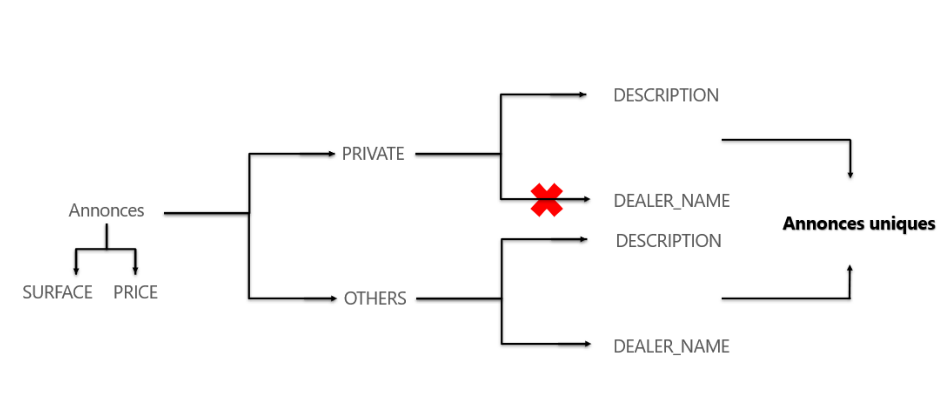

In [411]:
import matplotlib.image as mpimg

img = mpimg.imread('C:\\Users\\33751\\OneDrive\\Bureau\\entretien\\architecture.png')

plt.figure(figsize=(12, 6))  

plt.imshow(img)
plt.axis('off') 
plt.show()

l'image ci-dessus montre le flux de traitement des données 



---
# **Piste d'amélioration**



Plusieurs axes d'amélioration sont envisageables pour optimiser davantage notre processus de traitement des données:

**En premier lieu**, nous pourrions améliorer la qualité des données en comparant les annonces avec des valeurs manquantes dans la variable 'SURFACE' à la fin du processus. Cette étape permettrait de réduire les données manquantes en surface, en recherchant des informations cohérentes dans les annonces existantes.

**Deuxièmement**, une amélioration significative pourrait être apportée en intégrant des techniques de deep learning pour travailler sur les images associées aux annonces. Cela nous permettrait non seulement d'extraire des données manquantes potentielles à partir des images, mais également de détecter plus efficacement les doublons en utilisant des fonctionnalités avancées de reconnaissance d'image.

**Enfin**, une autre piste d'amélioration serait d'automatiser l'ensemble du processus en créant un pipeline de traitement des données. Malheureusement, en raison de contraintes de temps, je me suis contenter d'une démarche manuelle pour cette itération. Cependant, la création d'un pipeline automatisé simplifierait et accélérerait considérablement le traitement des données, offrant une solution plus efficace et reproductible pour l'avenir."